In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\harde\Desktop\Data Science Folder\ApparelSales.csv')
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [14]:
print(df.head(20))

          Date        Time State     Group  Unit  Sales
0   1-Oct-2020     Morning    WA      Kids     8  20000
1   1-Oct-2020     Morning    WA       Men     8  20000
2   1-Oct-2020     Morning    WA     Women     4  10000
3   1-Oct-2020     Morning    WA   Seniors    15  37500
4   1-Oct-2020   Afternoon    WA      Kids     3   7500
5   1-Oct-2020   Afternoon    WA       Men    10  25000
6   1-Oct-2020   Afternoon    WA     Women     3   7500
7   1-Oct-2020   Afternoon    WA   Seniors    11  27500
8   1-Oct-2020     Evening    WA      Kids    15  37500
9   1-Oct-2020     Evening    WA       Men    15  37500
10  1-Oct-2020     Evening    WA     Women     3   7500
11  1-Oct-2020     Evening    WA   Seniors    10  25000
12  1-Oct-2020     Morning    NT      Kids    13  32500
13  1-Oct-2020     Morning    NT       Men     5  12500
14  1-Oct-2020     Morning    NT     Women     4  10000
15  1-Oct-2020     Morning    NT   Seniors    10  25000
16  1-Oct-2020   Afternoon    NT      Kids    13

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [9]:
print(df.describe())

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


In [11]:
print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [17]:
kids_sales = df[df['Group'] == 'kids']
print(kids_sales)

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [19]:
df_cleaned = df.dropna()
df_cleaned.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize (assuming 'Sales' and 'Unit')
scaler = MinMaxScaler()
df_cleaned[['Sales', 'Unit']] = scaler.fit_transform(df_cleaned[['Sales', 'Unit']])

df_cleaned


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,0.142857,0.142857


In [27]:
df_cleaned

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,0.142857,0.142857


In [29]:
# Descriptive statistics for Sales
print("Sales Statistics:")
print(df_cleaned['Sales'].describe())

# Descriptive statistics for Units
print("\nUnits Statistics:")
print(df_cleaned['Unit'].describe())

# Mean, Median, Mode, and Standard Deviation
sales_mean = df_cleaned['Sales'].mean()
sales_median = df_cleaned['Sales'].median()
sales_mode = df_cleaned['Sales'].mode()[0]  # Mode returns a series, get the first value
sales_std = df_cleaned['Sales'].std()

print(f"\nSales Mean: {sales_mean}")
print(f"Sales Median: {sales_median}")
print(f"Sales Mode: {sales_mode}")
print(f"Sales Standard Deviation: {sales_std}")


Sales Statistics:
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64

Units Statistics:
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64

Sales Mean: 0.25405433778449654
Sales Median: 0.1904761904761905
Sales Mode: 0.1111111111111111
Sales Standard Deviation: 0.2047841710728009


In [33]:
# Group by State
state_sales = df_cleaned.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("State-wise Sales:")
print(state_sales)

# Group by Demographic Group
group_sales = df_cleaned.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("\nGroup-wise Sales:")
print(group_sales)


State-wise Sales:
State
 VIC    635.968254
 NSW    441.714286
 SA     339.412698
 QLD    177.888889
 TAS    110.222222
 NT     109.079365
 WA     106.365079
Name: Sales, dtype: float64

Group-wise Sales:
Group
 Men        484.444444
 Women      482.492063
 Kids       480.142857
 Seniors    473.571429
Name: Sales, dtype: float64


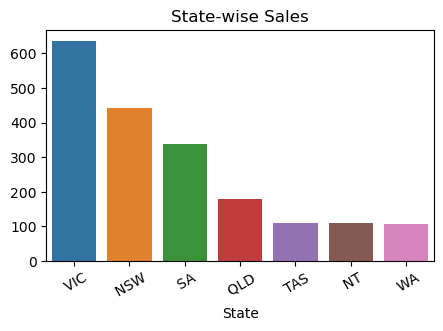

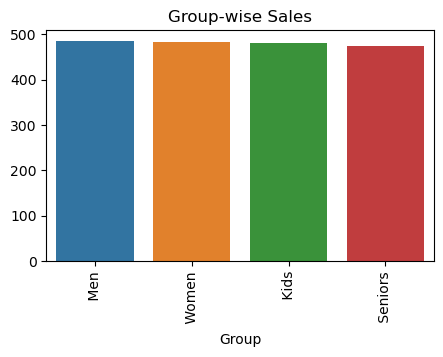

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# State-wise Sales Analysis
plt.figure(figsize=(5, 3))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('State-wise Sales')
plt.xticks(rotation=30)
plt.show()

# Group-wise Sales Analysis
plt.figure(figsize=(5, 3))
sns.barplot(x=group_sales.index, y=group_sales.values)
plt.title('Group-wise Sales')
plt.xticks(rotation=90)
plt.show()



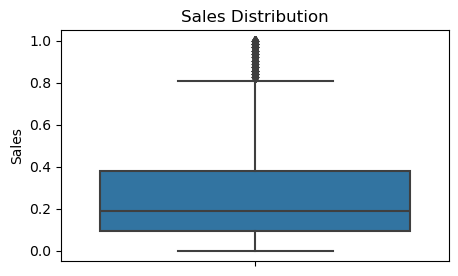

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


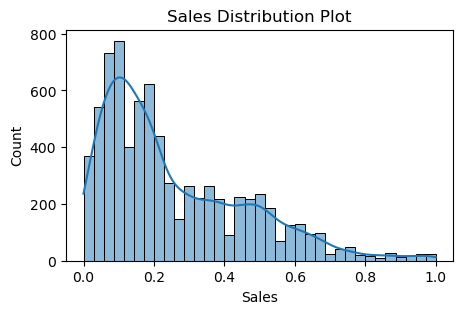

In [57]:
# Box Plot for Sales
plt.figure(figsize=(5, 3))
sns.boxplot(y='Sales', data=df_cleaned)
plt.title('Sales Distribution')
plt.show()

# Distribution Plot for Sales
plt.figure(figsize=(5, 3))
sns.histplot(df_cleaned['Sales'], kde=True)
plt.title('Sales Distribution Plot')
plt.show()
